## Testing and Debugging the BPASS isochrone at 10^7.0 years age. (Non Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^7.0 years age, a tenth of solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or of 110 (state of NEWSECMODS remnant primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

**I will be using the Kennicutt IMF(Kennicutt 1983) and a slightly different age. I also use the MISTv.1 model as there are no non-solar-metallicity models for the other stellar evolution models.**

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
import numpy as np
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(7.0, 0.0, 1000,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=4.50 for T= 48500 logg=3.98
Changing to T= 50000 for T=164324 logg=5.78
Changing to logg=5.00 for T=164324 logg=5.78
Changing to T= 50000 for T=102353 logg=5.41
Changing to logg=5.00 for T=102353 logg=5.41
Changing to T= 50000 for T= 69632 logg=4.38
Changing to logg=5.00 for T= 69632 logg=4.38
Changing to T= 50000 for T= 69390 logg=4.71
Changing to logg=5.00 for T= 69390 logg=4.71
Changing to T= 50000 for T=102877 logg=5.42
Changing to logg=5.00 for T=102877 logg=5.42
Changing to T= 50000 for T= 71453 logg=4.77
Changing to logg=5.00 for T= 71453 logg=4.77
Changing to T= 50000 for T=103588 logg=5.41
Changing to logg=5.00 for T=103588 logg=5.41
Changing to T= 50000 for T= 82465 logg=5.17
Changing to logg=5.00 for T= 82465 logg=5.17
Changing to logg=4.00 for T= 31125 logg=3.66
Changing to T= 50000 for T= 59860 logg=4.13
Changing to logg=5.00 for T= 59860 logg=4.13
Changing to logg=4.00 for T= 35763 logg=3.88
Changing to T= 50000 for T= 70651 logg=4.75
Changing to logg=5.0

Changing to logg=4.00 for T= 32498 logg=3.50
Changing to T= 50000 for T=103343 logg=5.41
Changing to logg=5.00 for T=103343 logg=5.41
Changing to T= 50000 for T=100716 logg=5.42
Changing to logg=5.00 for T=100716 logg=5.42
Changing to T= 50000 for T= 65121 logg=4.26
Changing to logg=5.00 for T= 65121 logg=4.26
Changing to T= 50000 for T= 74024 logg=4.48
Changing to logg=5.00 for T= 74024 logg=4.48
Changing to T= 50000 for T= 69684 logg=4.38
Changing to logg=5.00 for T= 69684 logg=4.38
Changing to T= 50000 for T=101513 logg=5.42
Changing to logg=5.00 for T=101513 logg=5.42
Changing to T= 50000 for T= 74302 logg=4.48
Changing to logg=5.00 for T= 74302 logg=4.48
Changing to T= 50000 for T= 93233 logg=5.17
Changing to logg=5.00 for T= 93233 logg=5.17
Changing to logg=4.50 for T= 41743 logg=3.70
Changing to T= 50000 for T= 74305 logg=4.48
Changing to logg=5.00 for T= 74305 logg=4.48
Changing to T= 50000 for T= 72751 logg=4.45
Changing to logg=5.00 for T= 72751 logg=4.45
Changing to T= 50000

Changing to logg=4.50 for T= 42886 logg=3.75
Changing to T= 50000 for T= 67473 logg=4.32
Changing to logg=5.00 for T= 67473 logg=4.32
Changing to T= 50000 for T=102134 logg=5.40
Changing to logg=5.00 for T=102134 logg=5.40
Changing to logg=2.00 for T= 11391 logg=0.99
Changing to logg=4.00 for T= 31478 logg=3.74
Changing to T= 50000 for T= 69920 logg=4.38
Changing to logg=5.00 for T= 69920 logg=4.38
Changing to T= 50000 for T= 68509 logg=4.34
Changing to logg=5.00 for T= 68509 logg=4.34
Changing to T= 50000 for T= 68223 logg=4.34
Changing to logg=5.00 for T= 68223 logg=4.34
Changing to T= 50000 for T= 69174 logg=4.37
Changing to logg=5.00 for T= 69174 logg=4.37
Changing to T= 50000 for T= 71717 logg=4.43
Changing to logg=5.00 for T= 71717 logg=4.43
Changing to logg=3.50 for T= 26285 logg=3.28
Changing to T= 50000 for T= 72144 logg=4.80
Changing to logg=5.00 for T= 72144 logg=4.80
Changing to logg=4.50 for T= 45454 logg=3.86
Changing to T= 50000 for T= 66764 logg=4.30
Changing to logg=5.

Changing to T= 50000 for T= 57106 logg=4.30
Changing to logg=5.00 for T= 57106 logg=4.30
Changing to T= 50000 for T= 74521 logg=4.49
Changing to logg=5.00 for T= 74521 logg=4.49
Changing to T= 50000 for T= 61325 logg=4.18
Changing to logg=5.00 for T= 61325 logg=4.18
Changing to T= 50000 for T= 70940 logg=4.41
Changing to logg=5.00 for T= 70940 logg=4.41
Changing to T= 50000 for T= 54369 logg=4.20
Changing to logg=5.00 for T= 54369 logg=4.20
Changing to T= 50000 for T= 69440 logg=4.37
Changing to logg=5.00 for T= 69440 logg=4.37
Changing to T= 50000 for T= 66364 logg=4.29
Changing to logg=5.00 for T= 66364 logg=4.29
Changing to logg=4.00 for T= 34156 logg=3.75
Changing to T= 50000 for T= 67126 logg=4.31
Changing to logg=5.00 for T= 67126 logg=4.31
Changing to T= 50000 for T=102113 logg=5.40
Changing to logg=5.00 for T=102113 logg=5.40
Changing to logg=3.00 for T= 20951 logg=2.96
Changing to T= 50000 for T= 74781 logg=4.49
Changing to logg=5.00 for T= 74781 logg=4.49
Changing to T= 50000

Changing to logg=4.00 for T= 31789 logg=3.54
Changing to T= 50000 for T= 95984 logg=4.82
Changing to logg=5.00 for T= 95984 logg=4.82
Changing to T= 50000 for T=102197 logg=5.40
Changing to logg=5.00 for T=102197 logg=5.40
Changing to T= 50000 for T= 61423 logg=4.19
Changing to logg=5.00 for T= 61423 logg=4.19
Changing to T= 50000 for T=103193 logg=5.40
Changing to logg=5.00 for T=103193 logg=5.40
Changing to T= 50000 for T= 50852 logg=4.07
Changing to logg=5.00 for T= 50852 logg=4.07
Changing to logg=4.00 for T= 31761 logg=3.51
Changing to T= 50000 for T=172330 logg=5.86
Changing to logg=5.00 for T=172330 logg=5.86
Changing to T= 50000 for T= 69844 logg=4.38
Changing to logg=5.00 for T= 69844 logg=4.38
Changing to T= 50000 for T= 76206 logg=4.80
Changing to logg=5.00 for T= 76206 logg=4.80
Changing to T= 50000 for T= 65890 logg=4.28
Changing to logg=5.00 for T= 65890 logg=4.28
Changing to T= 50000 for T=102527 logg=5.40
Changing to logg=5.00 for T=102527 logg=5.40
Changing to T= 50000

Changing to T= 50000 for T= 70672 logg=4.40
Changing to logg=5.00 for T= 70672 logg=4.40
Changing to logg=3.50 for T= 26974 logg=3.45
Changing to T= 50000 for T= 74307 logg=4.48
Changing to logg=5.00 for T= 74307 logg=4.48
Changing to T= 50000 for T= 64892 logg=4.26
Changing to logg=5.00 for T= 64892 logg=4.26
Changing to T= 50000 for T=132468 logg=5.53
Changing to logg=5.00 for T=132468 logg=5.53
Changing to T= 50000 for T=132764 logg=5.53
Changing to logg=5.00 for T=132764 logg=5.53
Changing to T= 50000 for T= 73264 logg=4.46
Changing to logg=5.00 for T= 73264 logg=4.46
Changing to T= 50000 for T= 74659 logg=4.49
Changing to logg=5.00 for T= 74659 logg=4.49
Changing to T= 50000 for T=101623 logg=5.42
Changing to logg=5.00 for T=101623 logg=5.42
Changing to T= 50000 for T=170279 logg=5.84
Changing to logg=5.00 for T=170279 logg=5.84
Changing to T= 50000 for T= 74425 logg=4.48
Changing to logg=5.00 for T= 74425 logg=4.48
Changing to T= 50000 for T= 72404 logg=4.44
Changing to logg=5.00

Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T=101606 logg=5.41
Changing to logg=5.00 for T=101606 logg=5.41
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to T= 50000 for T=100510 logg=5.42
Changing to logg=5.00 for T=100510 logg=5.42
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T= 71000 logg=4.40
Changing to logg=5.00 for T= 71000 logg=4.40
Changing to logg=2.00 for T=  9772 logg=1.67
Changing to T= 50000 for T= 72345 logg=4.44
Changing to logg=5.00 for T= 72345 logg=4.44
Changing to T= 50000 for T= 70474 logg=4.40
Changing to logg=5.00 for T= 70474 logg=4.40
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing 

Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 84680 logg=5.43
Changing to logg=5.00 for T= 84680 logg=5.43
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 72399 logg=4.45
Changing to logg=5.00 for T= 72399 logg=4.45
Changing to T= 50000 for T= 65076 logg=4.24
Changing to logg=5.00 for T= 65076 logg=4.24
Changing to T= 50000 for T= 66627 logg=4.29
Changing to logg=5.00 for T= 66627 logg=4.29
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to T= 50000 for T= 69929 logg=4.39
Changing to logg=5.00 for T= 69929 logg=4.39
Changing to logg=3.50 for T= 26699 logg=2.90
Changing to logg=4.50 for T= 43064 logg=3.76
Changing to T= 50000 for T= 62509 logg=4.18
Changing to logg=5.00 for T= 62509 logg=4.18
Changing to T= 50000 for T= 95192 logg=5.08
Changing to lo

Changing to T= 50000 for T= 71836 logg=4.43
Changing to logg=5.00 for T= 71836 logg=4.43
Changing to T=  1200 for T=   692 logg=4.44
Changing to T= 50000 for T=101906 logg=5.42
Changing to logg=5.00 for T=101906 logg=5.42
Changing to T=  1200 for T=   692 logg=4.44
Changing to T=  1200 for T=   692 logg=4.44
Changing to T= 50000 for T= 70351 logg=4.40
Changing to logg=5.00 for T= 70351 logg=4.40
Changing to T= 50000 for T= 70066 logg=4.37
Changing to logg=5.00 for T= 70066 logg=4.37
Changing to T= 50000 for T= 96627 logg=5.44
Changing to logg=5.00 for T= 96627 logg=5.44
Changing to T= 50000 for T= 70306 logg=4.38
Changing to logg=5.00 for T= 70306 logg=4.38
Changing to T= 50000 for T= 72375 logg=4.45
Changing to logg=5.00 for T= 72375 logg=4.45
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to T= 50000 for T= 72552 logg=4.46
Changing to logg=5.00 for T= 72552 logg=4.46
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to T= 5000

M =  13.000 Msun  T = 26107 K  m_ubv_U = 5.36
M =   1.200 Msun  T =  7594 K  m_ubv_U = 12.81
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =  19.000 Msun  T = 101672 K  m_ubv_U = 8.81
M =  15.000 Msun  T = 26270 K  m_ubv_U = 4.69
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =  20.000 Msun  T = 65184 K  m_ubv_U = 6.02
M =   3.162 Msun  T =   nan K  m_ubv_U =  nan
M =   3.981 Msun  T =   nan K  m_ubv_U =  nan
M =   8.500 Msun  T = 22028 K  m_ubv_U = 6.88
M =   9.000 Msun  T = 22647 K  m_ubv_U = 6.69
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   1.200 Msun  T =  5987 K  m_ubv_U = 15.00
M =  14.000 Msun  T = 26300 K  m_ubv_U = 5.01
M =   3.162 Msun  T =   nan K  m_ubv_U =  nan
M =   0.900 Msun  T =  6908 K  m_ubv_U = 13.37
M =   3.981 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =  6560 K  m_ubv_U = 13.78
M =  13.000 Msun  T = 26107 K  m_ubv_U = 5.36
Secondaries
M =   1.700 Msun  T =  7893 K  m_ubv_U = 12.71
M =  11.000 Msun

M =   8.500 Msun  T = 22028 K  m_ubv_B = 7.72
M =   9.000 Msun  T = 22647 K  m_ubv_B = 7.55
M =   1.400 Msun  T =   nan K  m_ubv_B =  nan
M =   1.200 Msun  T =  5987 K  m_ubv_B = 14.98
M =  14.000 Msun  T = 26300 K  m_ubv_B = 5.98
M =   3.162 Msun  T =   nan K  m_ubv_B =  nan
M =   0.900 Msun  T =  6908 K  m_ubv_B = 13.42
M =   3.981 Msun  T =   nan K  m_ubv_B =  nan
M =   1.400 Msun  T =  6560 K  m_ubv_B = 13.83
M =  13.000 Msun  T = 26107 K  m_ubv_B = 6.31
Secondaries
M =   1.700 Msun  T =  7893 K  m_ubv_B = 12.69
M =  11.000 Msun  T = 24743 K  m_ubv_B = 6.90
M =   8.400 Msun  T = 23278 K  m_ubv_B = 7.91
M =  18.000 Msun  T =  3545 K  m_ubv_B = 6.31
M =   1.400 Msun  T =  6571 K  m_ubv_B = 13.82
M =   0.700 Msun  T =  4039 K  m_ubv_B = 18.96
M =  12.000 Msun  T = 25146 K  m_ubv_B = 6.48
M =   4.500 Msun  T = 16036 K  m_ubv_B = 9.54
M =   9.000 Msun  T = 24171 K  m_ubv_B = 7.71
M =  16.000 Msun  T = 25206 K  m_ubv_B = 5.21
M =   0.960 Msun  T =  5540 K  m_ubv_B = 15.86
M =  21.000 Msu

M =  13.000 Msun  T = 26107 K  m_ubv_I = 6.90
Secondaries
M =   1.700 Msun  T =  7893 K  m_ubv_I = 12.23
M =  11.000 Msun  T = 24743 K  m_ubv_I = 7.46
M =   8.400 Msun  T = 23278 K  m_ubv_I = 8.45
M =  18.000 Msun  T =  3545 K  m_ubv_I = 1.98
M =   1.400 Msun  T =  6571 K  m_ubv_I = 12.82
M =   0.700 Msun  T =  4039 K  m_ubv_I = 15.91
M =  12.000 Msun  T = 25146 K  m_ubv_I = 7.05
M =   4.500 Msun  T = 16036 K  m_ubv_I = 9.89
M =   9.000 Msun  T = 24171 K  m_ubv_I = 8.27
M =  16.000 Msun  T = 25206 K  m_ubv_I = 5.78
M =   0.960 Msun  T =  5540 K  m_ubv_I = 14.24
M =  21.000 Msun  T =  3288 K  m_ubv_I = 1.41
M =   4.800 Msun  T = 16705 K  m_ubv_I = 9.75
M =   6.400 Msun  T = 19911 K  m_ubv_I = 9.11
M =   6.400 Msun  T = 19914 K  m_ubv_I = 9.10
M =   4.400 Msun  T = 15811 K  m_ubv_I = 9.94
M =  12.600 Msun  T = 28070 K  m_ubv_I = 7.22
M =   3.200 Msun  T =   nan K  m_ubv_I =  nan
M =  14.000 Msun  T = 26173 K  m_ubv_I = 6.50
M =  11.200 Msun  T = 26902 K  m_ubv_I = 7.63
M =   9.100 Msun  

As a sanity check, I would like to make sure that, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (models with phase 101), and non-white dwarf compact remnants that are  NEWSECMODS primaries (models with phase 110). Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged.

In [2]:
import numpy as np
np.all([(x==5 or x==101 or x==110) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x==5 or x==101) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

4.591806913365015

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

5.898517399939001

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

5.7676806790772

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.178243141326868

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.024477317485913

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

3.96292885544605

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.194452095013302

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

3.963068092288352

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.239978886358815

Text(0.5, 0, 'logg in cgs')

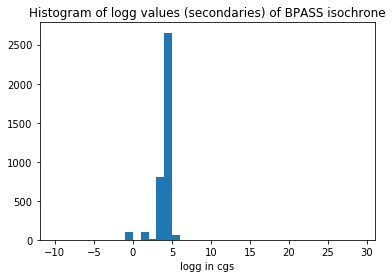

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

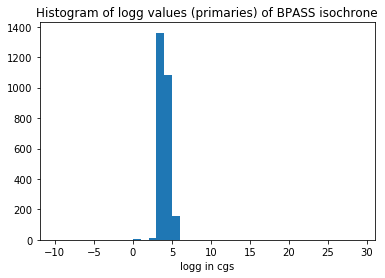

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

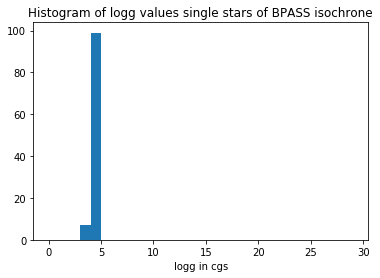

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

What exactly could be causing the vertical line? First, I want to zoom in...
Plotting the CMD for the Color magnitude diagram for high surface gravity stars. Remember to account for distance modulus for dist = 1000 pc

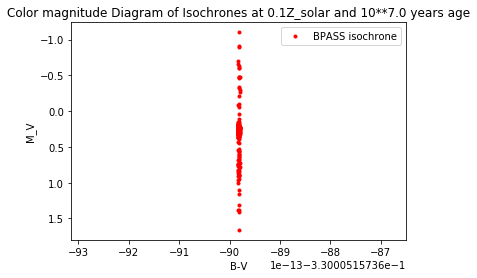

In [17]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg']>5)[0]
indices2= np.where(iso1.primaries['logg']>5)[0]
indices3= np.where(iso1.secondaries['logg']>5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2]-iso1.primaries["m_ubv_V"][indices2], iso1.primaries["m_ubv_V"][indices2]-5*np.log10(1000/10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3]-iso1.secondaries["m_ubv_V"][indices3], iso1.secondaries["m_ubv_V"][indices3]-5*np.log10(1000/10), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1]-iso1.singles["m_ubv_V"][indices1], iso1.singles["m_ubv_V"][indices1]-5*np.log10(1000/10), "r.", label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

In [18]:
indices2= np.where((iso1.primaries['logg']>5) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>-0.4) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<-0.2))[0]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [19]:
np.unique(iso1.primaries[indices2]['phase'])

5.0


In [20]:
indices2= np.where((iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>1.2) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<1.5))[0]

In [21]:
indices2

array([ 521,  886, 1232, 2575, 2625, 3546])

In [22]:
np.unique(iso1.primaries['phase'][indices2])

5.0


In [23]:
iso1.primaries[indices2]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
0.5,3.701876526796279e+25,4145.052160549565,419507919.8267586,4.825723955469789,False,0.89071,5.0,1,20.437604263084005,18.131091098684863,19.414958292436772,17.40490362023792,16.486232226276606
0.5,2.890293386213339e+25,4031.530966522622,391850282.5166305,4.833837639783422,False,0.79179,5.0,1,20.84396913971463,18.497728299926955,19.824070269456783,17.746930600274283,16.750912326369324
0.5,2.352458274547379e+25,3938.492293351224,370416363.85055035,4.854655386378446,False,0.74228,5.0,1,21.175107555814794,18.808248524740222,20.16295631814816,18.03908656764072,16.970816636559615
0.5,3.701876526796279e+25,4145.052160549565,419507919.8267586,4.825723955469789,False,0.89071,5.0,1,20.437604263084005,18.131091098684863,19.414958292436772,17.40490362023792,16.486232226276606
0.5,2.9313112117324236e+25,4043.9893203014135,392193294.63481796,4.859418516218744,False,0.8413,5.0,1,20.808569641197757,18.469194999580722,19.79152882740641,17.720943825444312,16.73421473725699
0.5,2.9313112117324236e+25,4043.9893203014135,392193294.63481796,4.859418516218744,False,0.8413,5.0,1,20.808569641197757,18.469194999580722,19.79152882740641,17.720943825444312,16.73421473725699


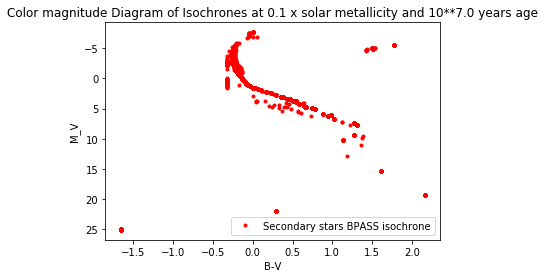

In [24]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.", label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1 x solar metallicity and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

Hmm, I think those are stars that are going to be white dwarves very soon or may unintentionally be brown dwarves. At least according to HOKI's criterion for what is a white dwarf or not. At the very least, at least the stars we just saw were low mass stars so they should be **LOW** on the CMD

In [25]:
iso2=synthetic.IsochronePhot(7.0, 0.0, 1000, math.log10(1/10), recomp=True) # New Parsec isochrone for same metallicity

Changing to logg=4.00 for T= 31270 logg=4.00
Changing to logg=4.00 for T= 31267 logg=3.99
Changing to logg=4.00 for T= 31259 logg=3.98
Changing to logg=4.00 for T= 31245 logg=3.97
Changing to logg=4.00 for T= 31226 logg=3.96
Changing to logg=4.00 for T= 31200 logg=3.94
Changing to logg=4.00 for T= 31169 logg=3.93
Changing to logg=4.00 for T= 31139 logg=3.92
Changing to logg=4.00 for T= 31109 logg=3.91
Changing to logg=4.00 for T= 31072 logg=3.90
Changing to logg=4.00 for T= 31032 logg=3.89
Changing to logg=4.00 for T= 31013 logg=3.64
Changing to logg=4.00 for T= 31102 logg=3.64
Changing to logg=4.00 for T= 31185 logg=3.64
Changing to logg=4.00 for T= 31263 logg=3.65
Changing to logg=4.00 for T= 31337 logg=3.65
Changing to logg=4.00 for T= 31405 logg=3.65
Changing to logg=4.00 for T= 31467 logg=3.65
Changing to logg=4.00 for T= 31520 logg=3.65
Changing to logg=4.00 for T= 31564 logg=3.66
Changing to logg=4.00 for T= 31593 logg=3.66
Changing to logg=4.00 for T= 31604 logg=3.66
Changing t

Changing to logg=2.00 for T= 10837 logg=1.58
Changing to logg=2.00 for T= 10690 logg=1.56
Changing to logg=2.00 for T= 10545 logg=1.54
Changing to logg=2.00 for T= 10402 logg=1.51
Changing to logg=2.00 for T= 10261 logg=1.49
Changing to logg=2.00 for T= 10121 logg=1.46
Changing to logg=2.00 for T=  9984 logg=1.44
Changing to logg=2.00 for T=  9848 logg=1.42
Changing to logg=2.00 for T=  9715 logg=1.39
Changing to logg=2.00 for T=  9583 logg=1.37
Changing to logg=2.00 for T=  9453 logg=1.34
Changing to logg=2.00 for T=  9324 logg=1.32
Changing to logg=2.00 for T=  9198 logg=1.30
Changing to logg=2.00 for T=  9073 logg=1.27
Changing to logg=1.50 for T=  8950 logg=1.25
Changing to logg=1.50 for T=  8828 logg=1.23
Changing to logg=1.50 for T=  8709 logg=1.20
Changing to logg=1.50 for T=  8591 logg=1.18
Changing to logg=1.50 for T=  8474 logg=1.16
Changing to logg=1.50 for T=  8359 logg=1.13
Changing to logg=1.00 for T=  7703 logg=0.99
Changing to logg=1.00 for T=  7599 logg=0.97
Isochrone 

Looking at the distribution of logg values. for the stars in the Parsec isochrone.

In [26]:
np.max(iso2.points['logg'])

4.583447298562488

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  72.,
         42.,  93., 208., 247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29]),
 <a list of 39 Patch objects>)

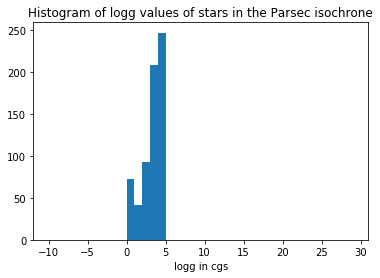

In [27]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))

In [28]:
np.median(iso2.points['logg'])

3.556386609995295

In [29]:
np.mean(iso2.points['logg'])

3.2602644297347076

In [30]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the Parsec isochrone

In [31]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 20000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 20000, ifmr=ifmr.IFMR_Spera15())

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the M type

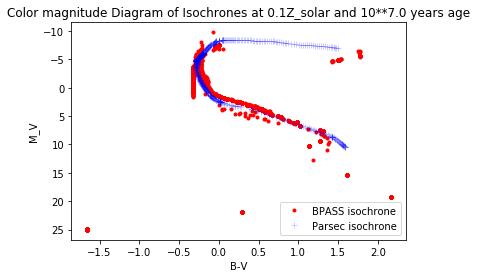

In [32]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100), "b+", label="Parsec isochrone", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the Parsec isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

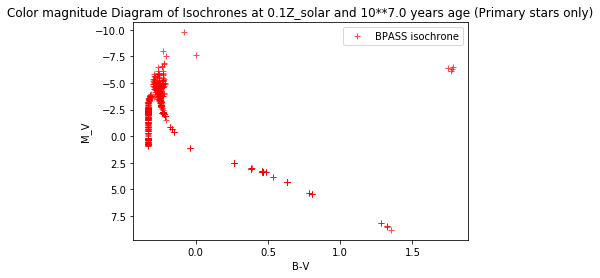

In [33]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

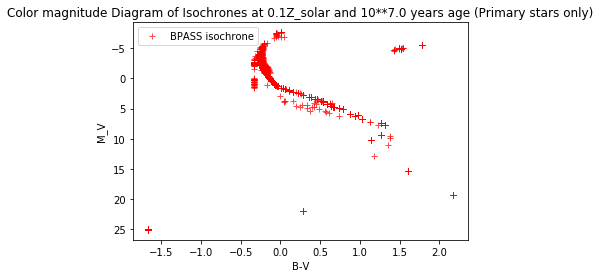

In [34]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

Where are some of the goofy outliers coming from?

In [35]:
iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"]-5*np.log10(100)>20.0)[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
0.13999999999999999,-0.8457534086880292,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.24,-0.18880640868802923,3.0481190775223414e+23,1384.9050534881078,340825439.456452,4.438058869014739,False,0.24,5.0,False,1,34.92996466228155,31.903293727020184,32.19317149638983,27.829343054500125,23.346389822396915
0.13999999999999999,-0.9790864086880291,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.12,-0.20140240868802906,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,36.64231782798875,35.070345010609906,33.40769843270179,30.56687074093737,24.659917675146843
0.12,0.06526459131197093,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,36.64231782798875,35.070345010609906,33.40769843270179,30.56687074093737,24.659917675146843
0.12,-0.7347354086880291,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,36.64231782798875,35.070345010609906,33.40769843270179,30.56687074093737,24.659917675146843
0.13999999999999999,0.0875795913119708,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.24,-0.5888064086880291,3.0481190775223414e+23,1384.9050534881078,340825439.456452,4.438058869014739,False,0.24,5.0,False,1,34.92996466228155,31.903293727020184,32.19317149638983,27.829343054500125,23.346389822396915


In [36]:
issue = iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"]-5*np.log10(100)>20.0)[0]]

In [37]:
np.unique(issue['mass'])

0.12
0.13999999999999999
0.24


In [38]:
np.unique(issue['phase'])

5.0


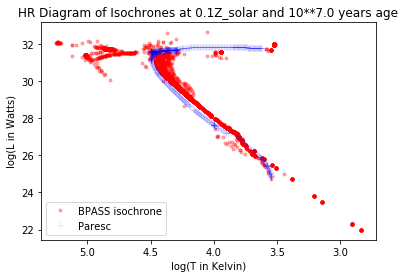

In [39]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+", label="Paresc", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

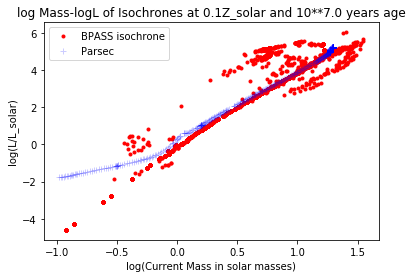

In [40]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b+", label="Parsec", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.
First I take a look at the shape of the primary stars' plot for log current mass log L.

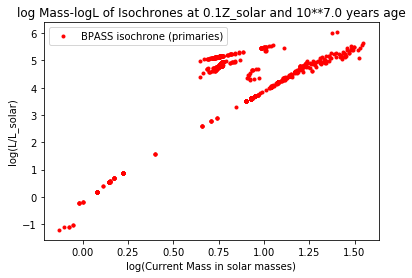

In [41]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.", label="BPASS isochrone (primaries)")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.legend()

Which type of secondary star is it that is causing this strange pattern?

In [42]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)>-3.30) & (np.log10(iso1.primaries["L"]/cs.L_sun)<-3.10))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [43]:
bad_line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [44]:
np.unique(bad_line['L'])

<Column name='L' dtype='float64' unit='W' length=0>

In [45]:
np.unique(bad_line['Teff'])

<Column name='Teff' dtype='float64' unit='K' length=0>

In [46]:
np.unique(bad_line['logg'])

<Column name='logg' dtype='float64' unit='' length=0>

In [47]:
np.unique(bad_line['mass'])

<Column name='mass' dtype='float64' unit='solMass' length=0>

In [48]:
np.unique(bad_line['phase'])

<Column name='phase' dtype='float64' length=0>

**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

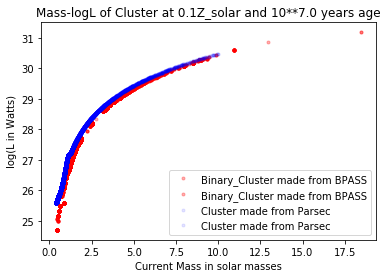

In [49]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =0.3)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 0.3)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.", label="Cluster made from Parsec", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Cluster made from Parsec", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

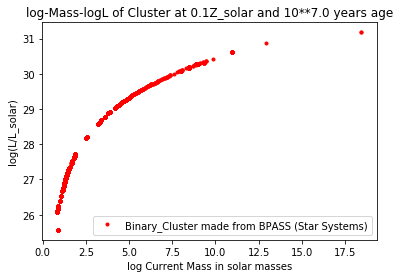

In [50]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS (Star Systems)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

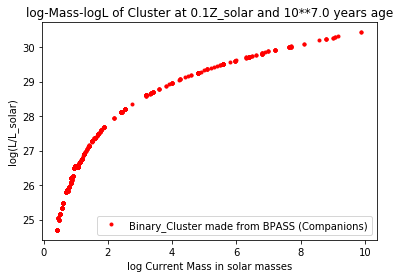

In [51]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS (Companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Now go back to the shape of the clusters' Color magnitude diagrams.

In [52]:
np.unique(clus_1.companions['log_a'])

-2.371963300259928
-2.2832722837140755
-2.1500910007462606
-1.9981604814799474
-1.8462351212003472
-1.782198711599623
-1.6894887293450154
-1.657807976635743
-1.630634969784964
-1.5431377070363983
-1.524498855117683


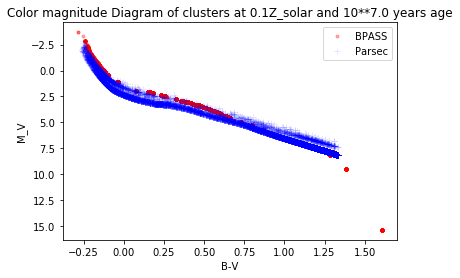

In [53]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(100), "r.",label="BPASS", alpha =0.3)
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(100), "b+", label="Parsec", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

In [54]:
clus_1.star_systems[np.where(clus_1.star_systems["m_ubv_V"]==0)]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,K,W,,,solMass,,,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64


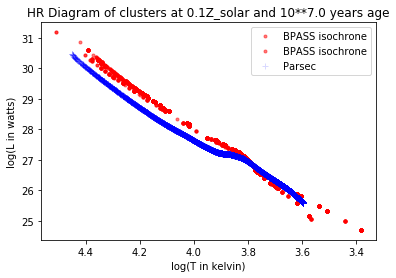

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]), "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]), "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]), "b+", label="Parsec", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_xaxis()
plt.legend()

If I look at the HR Diagram, I do see deviation with respects to the Parsec line for some of the brighter stars, but I see an overall good trend with the main-sequence turnoff. Also, I see the compact remnants where they should be given my setup.

Looking at which stars are the white dwarves?

In [56]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([  39,   75,  115,  130,  171,  238,  275,  299,  306,  344,  362,
        397,  463,  470,  499,  585,  611,  614,  628,  669,  709,  804,
        807,  831,  848,  849,  872,  874,  883,  947, 1088, 1106, 1125,
       1138, 1182, 1186, 1248, 1256, 1260, 1338, 1358, 1361, 1424, 1447,
       1530, 1556, 1577, 1688, 1692, 1702, 1731, 1753, 1754, 1759, 1786,
       1803, 1810, 1837, 1902, 1906, 1922, 1970, 1974, 2063, 2111, 2125,
       2131, 2210, 2226, 2243, 2251, 2283, 2290, 2347, 2353, 2364, 2427,
       2465, 2477, 2511, 2630, 2654])

Black Holes?

In [57]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

In [58]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

Total mass of the cluster?

In [59]:
clus_1.star_systems['systemMass'].sum()

21505.710559189753